Francisco Gutierrez Gallego y Gina Ramirez Guerro


Definición del proyecto con CRISP-DM


Definición de la tarea de mineria de datos
Nuestro objetivo es analizar el dataset para detectar el número de intrusiones en cuanto a ciberseguridad basado en el tráfico de red y el comportamiento de el usuario 
Preparación de los datos
Se tomaron 9436 casos con variables en cuenta como el tamaño de bytes de los paquetes, el tipo de protocolo y los métodos de encriptación, así como ciertas conductas del usuario como número de logins, duración de la sesión del usuario, entre otras. 
Se realizara la limpieza de datos nulos y atipicos para no afectar a las estadisticas. 


Proceso de construcción del modelo
Cargaremos desde Kaggle el dataset al Google Colab, con el fin de tener los datos la cual llamaremos base de conocimiento y así poder manipularlos posteriromente con los análisis con el fin de sacar estádisticas y probabilidades y entrenar al modelo.
Finalmente, el modelo será capaz de detectar intrusiones antes de que sucedan con el análisis del comportamiento del usuario. 

Evaluación e interpretación del modelo
Procederemos a realizar los siguientes análisis: descriptivo, univariante, bivariante y de correlación con los cuales podremos obtener información de como la media, minimos, máximos, los cuartiles y la desviación estándar.
Con la cantidad de casos satisfactorios que tenga nuestro modelo, podremos darnos cuenta si el dataset y las estadísticas son confiables,

Integración de los resultados en el proceso
Cuando tengamos el modelo óptimo, cuyo margen de error es pequeño, se podra integrar dicho modelo para que funcione de forma automatizada en servicios web para prevenir ataques e intrusiones.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
df=pd.read_csv('cybersecurity_intrusion_data.csv')

Analisis descriptivo

In [3]:
df.shape

(9537, 11)

In [4]:
df.head(1000)

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,SID_00996,443,UDP,4,422.310513,None,0.115795,2,Chrome,1,0
996,SID_00997,859,UDP,6,182.151983,AES,0.381430,1,Edge,0,0
997,SID_00998,628,TCP,6,564.040399,None,0.335371,2,Edge,0,0
998,SID_00999,385,TCP,8,500.715379,None,0.285088,0,Chrome,0,1


In [5]:
df.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      9537 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [7]:
# Reemplaza None y NaN en una columna específica (por ejemplo, 'encryption')
df['encryption_used'] = df['encryption_used'].fillna('Not Encrypted')

# Nos aseguramos de que 'None' como string sea reemplazado:
df['encryption_used'] = df['encryption_used'].replace('None', 'Not Encrypted')

df['encryption_used']

0                 DES
1                 DES
2                 DES
3                 DES
4                 AES
            ...      
9532              AES
9533    Not Encrypted
9534              AES
9535              AES
9536    Not Encrypted
Name: encryption_used, Length: 9537, dtype: object

In [8]:
column_names = df.columns
column_names

Index(['session_id', 'network_packet_size', 'protocol_type', 'login_attempts',
       'session_duration', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'browser_type', 'unusual_time_access',
       'attack_detected'],
      dtype='object')

Separamos los valores numericos y categoricos

In [9]:

vars_numeric = pd.DataFrame()
vars_categority = pd.DataFrame()
for i in column_names:
  if i != 'session_id': 
    if df[i].dtype != 'object' and i != 'attack_detected' and i != 'unusual_time_access' and i != 'failed_logins' and i != 'login_attempts':
      vars_numeric[i] = df[i]
    else:
      vars_categority[i] = df[i]

In [10]:
df.isnull().sum() #miramos si hay valores nulos

session_id             0
network_packet_size    0
protocol_type          0
login_attempts         0
session_duration       0
encryption_used        0
ip_reputation_score    0
failed_logins          0
browser_type           0
unusual_time_access    0
attack_detected        0
dtype: int64

In [11]:
df.duplicated().sum()

0

Analisis Univariante

Analisis univariante de valores numericos

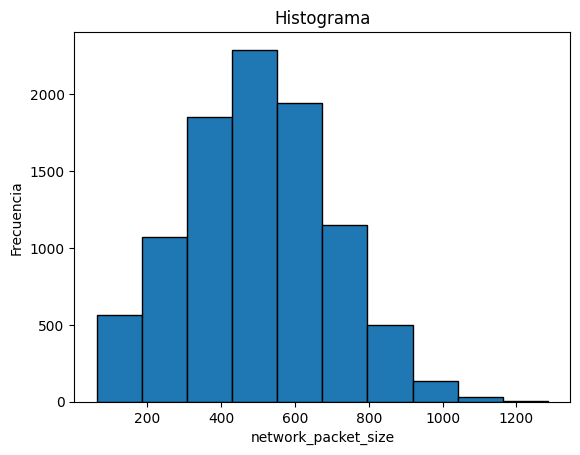

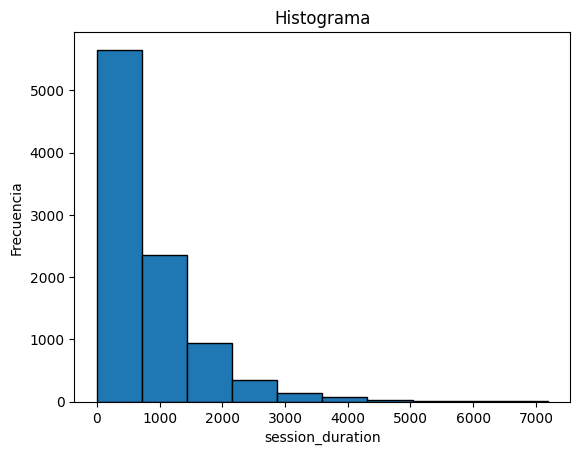

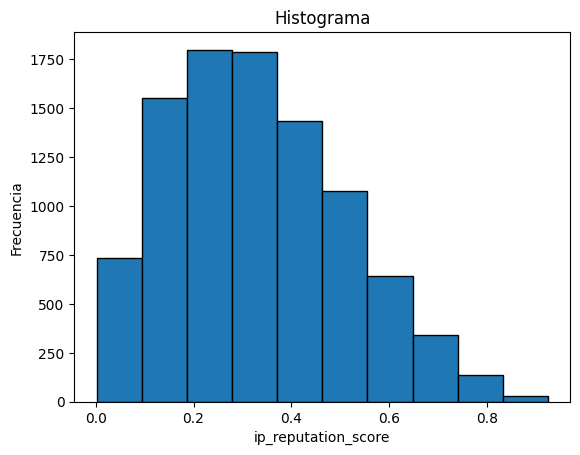

In [12]:
for i in vars_numeric:
  plt.hist(df[i], edgecolor='black')
  plt.title('Histograma')
  plt.xlabel(i)
  plt.ylabel('Frecuencia')
  plt.show()
  print()

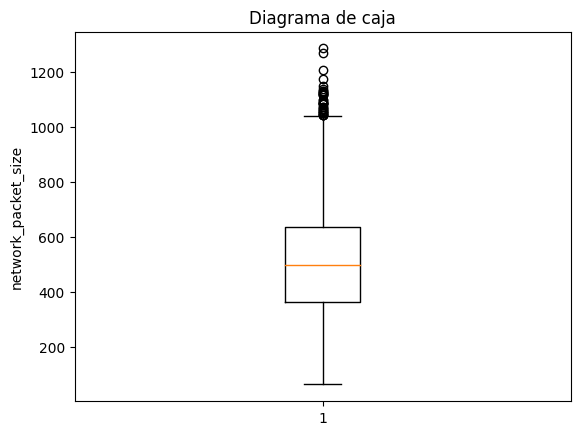

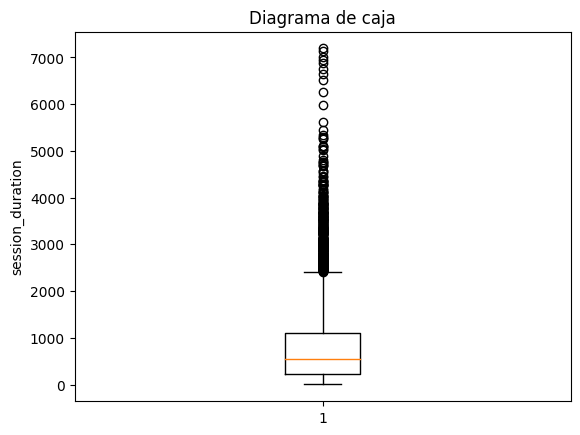

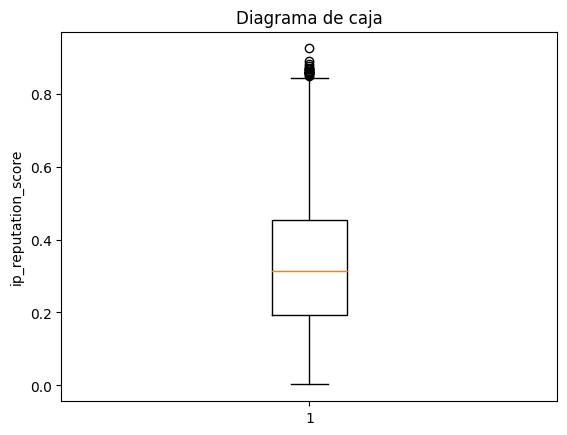

In [13]:
for i in vars_numeric:
    plt.boxplot(df[i])
    plt.title('Diagrama de caja')
    plt.ylabel(i)
    plt.show()
    print()

Analisis univariante de valores categoricos

In [14]:
vars_categority.head()

,protocol_type,login_attempts,encryption_used,failed_logins,browser_type,unusual_time_access,attack_detected
0,TCP,4,DES,1,Edge,0,1
1,TCP,3,DES,0,Firefox,0,0
2,TCP,3,DES,2,Chrome,0,1
3,UDP,4,DES,0,Unknown,0,1
4,TCP,5,AES,1,Firefox,0,0


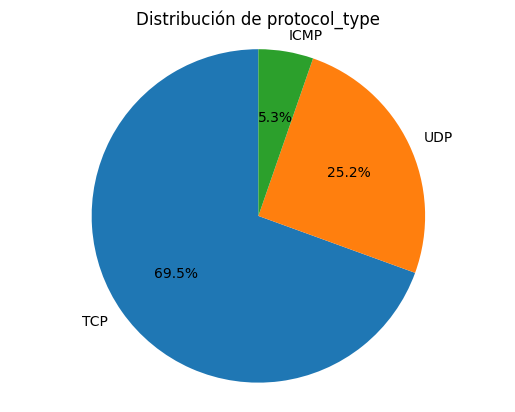

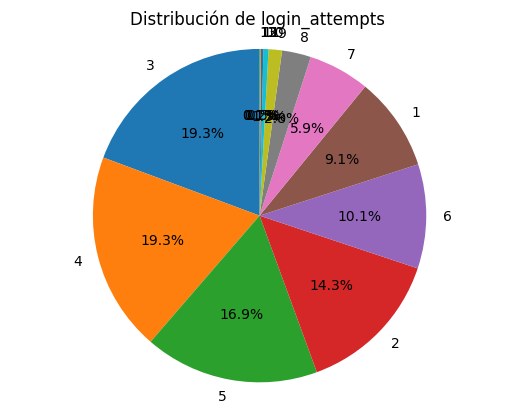

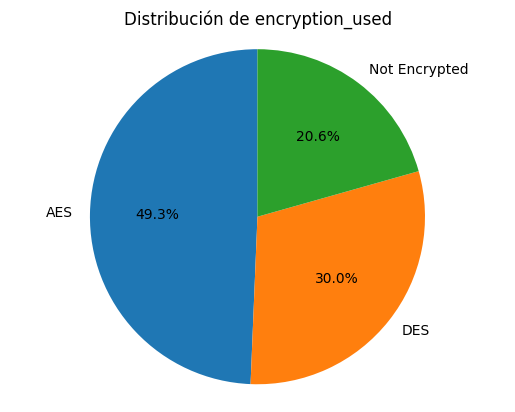

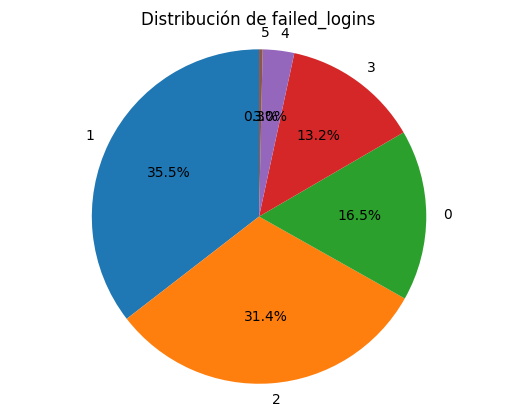

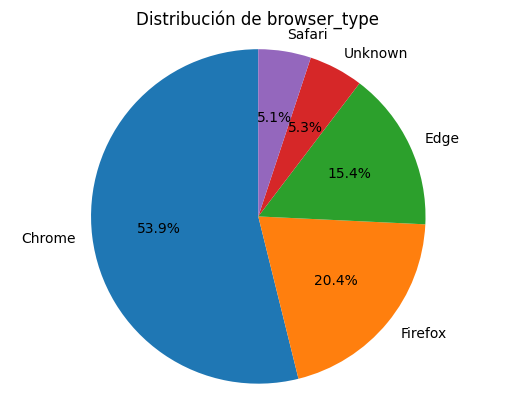

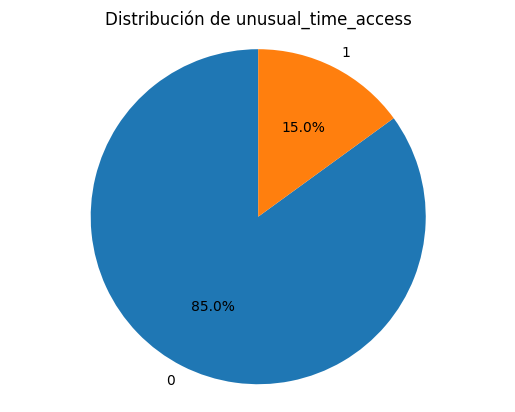

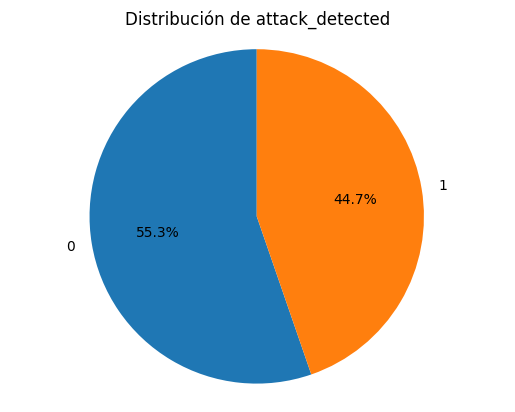

In [15]:
for i in vars_categority:
    value_counts = df[i].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title('Distribución de ' + i)
    plt.axis('equal') 
    plt.show()
    print()

Analisis bivariante entre numerica y numerica

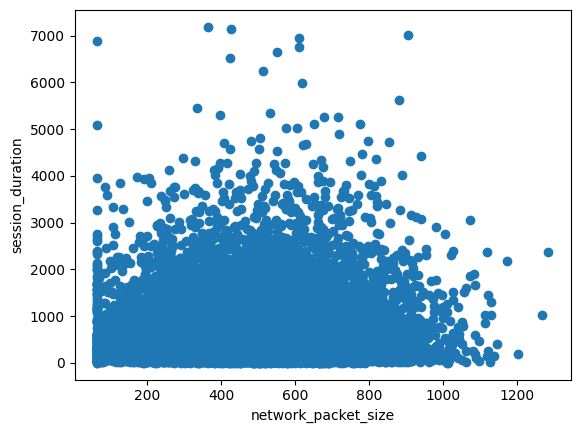

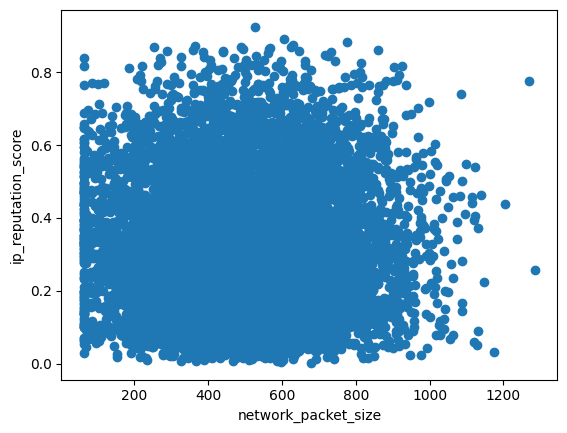

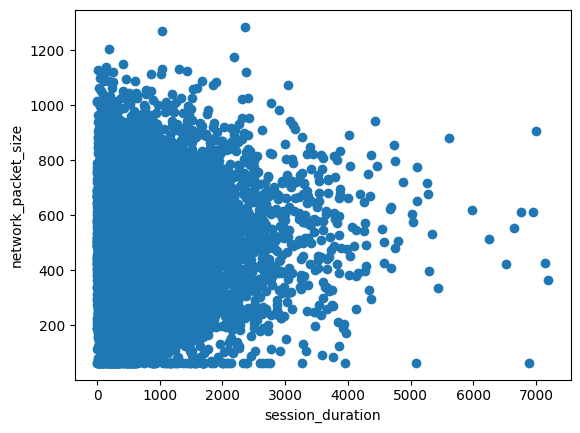

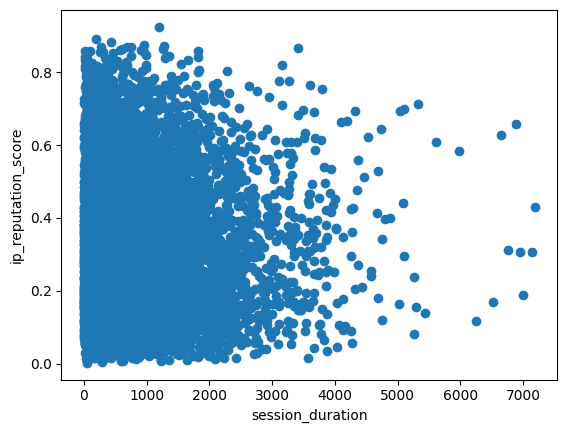

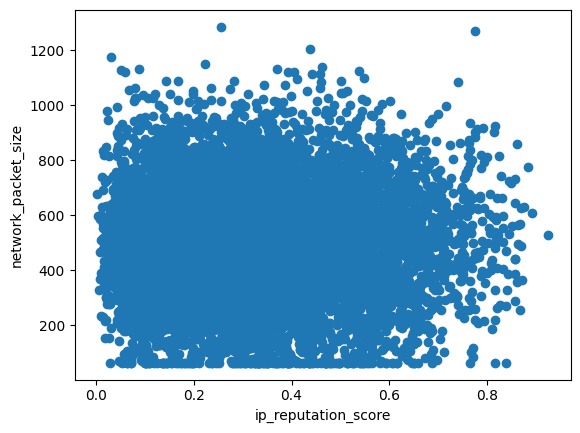

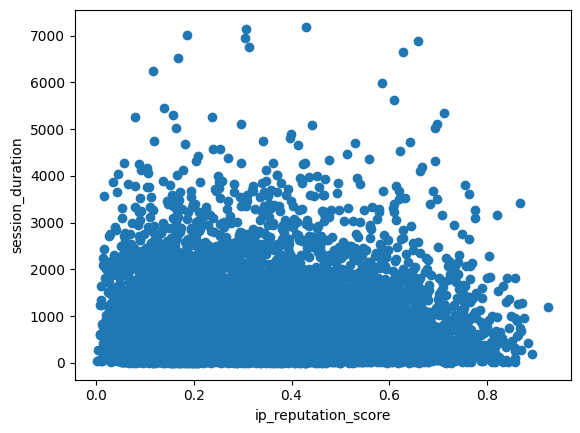

In [16]:
for i in vars_numeric.columns:
  for j in vars_numeric.columns:
    if i != j:
      plt.scatter(vars_numeric[i], vars_numeric[j])
      plt.xlabel(i)
      plt.ylabel(j)
      plt.show()
      print()

Analisis correlacion

In [17]:
vars_numeric.corr()

,network_packet_size,session_duration,ip_reputation_score
network_packet_size,1.00000,0.021650,0.002320
session_duration,0.02165,1.000000,-0.005077
ip_reputation_score,0.00232,-0.005077,1.000000


In [19]:
vars_numeric.head()

,network_packet_size,session_duration,ip_reputation_score
0,599,492.983263,0.606818
1,472,1557.996461,0.301569
2,629,75.044262,0.739164
3,804,601.248835,0.123267
4,453,532.540888,0.054874


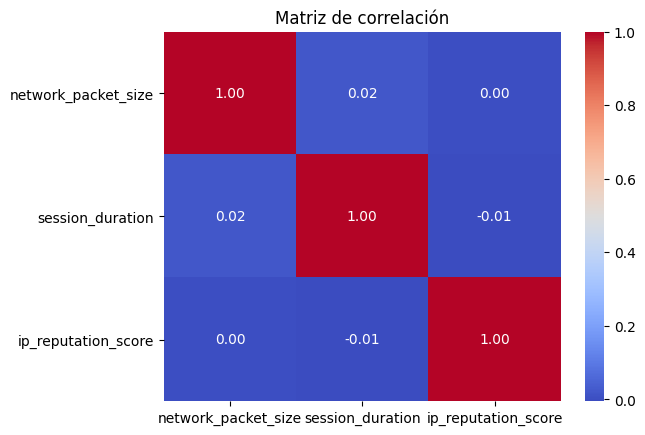

In [20]:

correlation_matrix = vars_numeric.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


procesamiento de datos

Limpieza de datos

In [21]:
df = df.drop(['session_id'], axis=1)
df.head()

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


Hemos quitado la columna session_id ya que son valores unicos donde el modelo no encontrara ningun patron

In [22]:
vars_categority

,protocol_type,login_attempts,encryption_used,failed_logins,browser_type,unusual_time_access,attack_detected
0,TCP,4,DES,1,Edge,0,1
1,TCP,3,DES,0,Firefox,0,0
2,TCP,3,DES,2,Chrome,0,1
3,UDP,4,DES,0,Unknown,0,1
4,TCP,5,AES,1,Firefox,0,0
...,...,...,...,...,...,...,...
9532,ICMP,3,AES,3,Chrome,0,1
9533,TCP,3,Not Encrypted,0,Chrome,0,0
9534,TCP,5,AES,1,Firefox,0,0
9535,TCP,4,AES,1,Chrome,1,0


Eliminacion de filas donde haya mas fallos de lgin que intentos

In [23]:
df = df[(df['failed_logins']<=df['login_attempts'])]

In [24]:
df.shape

(8807, 10)

Transformacion de datos

Pasamos encryption_used a valores numericos

In [25]:
encryption_used_map = {'AES':2, 'DES':1, 'Not Encrypted':0}
df['encryption_used'] = df['encryption_used'].map(encryption_used_map)



In [36]:
df.head(10)

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,2,4,492.983263,1,0.606818,1,NaN,0,1
1,472,2,3,1557.996461,1,0.301569,0,NaN,0,0
2,629,2,3,75.044262,1,0.739164,2,NaN,0,1
3,804,1,4,601.248835,1,0.123267,0,NaN,0,1
4,453,2,5,532.540888,2,0.054874,1,NaN,0,0
5,453,1,5,380.471550,2,0.422486,2,NaN,1,0
6,815,0,4,728.107165,2,0.413772,1,NaN,0,1
7,653,2,3,12.599906,1,0.097719,3,NaN,1,1
8,406,2,2,542.558895,0,0.294580,0,NaN,1,0
9,608,1,6,531.944107,0,0.424117,1,NaN,0,0


Pasamos protocol_type a valores numericos

In [31]:
protocol_type_map = {'TCP':2, 'UDP':1, 'ICMP':0}
df['protocol_type'] = df['protocol_type'].map(protocol_type_map)

In [32]:
df.head(10)

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,2,4,492.983263,1,0.606818,1,Edge,0,1
1,472,2,3,1557.996461,1,0.301569,0,Firefox,0,0
2,629,2,3,75.044262,1,0.739164,2,Chrome,0,1
3,804,1,4,601.248835,1,0.123267,0,Unknown,0,1
4,453,2,5,532.540888,2,0.054874,1,Firefox,0,0
5,453,1,5,380.471550,2,0.422486,2,Chrome,1,0
6,815,0,4,728.107165,2,0.413772,1,Chrome,0,1
7,653,2,3,12.599906,1,0.097719,3,Chrome,1,1
8,406,2,2,542.558895,0,0.294580,0,Chrome,1,0
9,608,1,6,531.944107,0,0.424117,1,Chrome,0,0


In [34]:
browser_type_map = {'Chrome':4, 'Firefox':3, 'Edge':2, 'Unknown':1, 'Safari':0}
df['browser_type'] = df['browser_type'].map(browser_type_map)

In [35]:
df.head(10)

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,2,4,492.983263,1,0.606818,1,NaN,0,1
1,472,2,3,1557.996461,1,0.301569,0,NaN,0,0
2,629,2,3,75.044262,1,0.739164,2,NaN,0,1
3,804,1,4,601.248835,1,0.123267,0,NaN,0,1
4,453,2,5,532.540888,2,0.054874,1,NaN,0,0
5,453,1,5,380.471550,2,0.422486,2,NaN,1,0
6,815,0,4,728.107165,2,0.413772,1,NaN,0,1
7,653,2,3,12.599906,1,0.097719,3,NaN,1,1
8,406,2,2,542.558895,0,0.294580,0,NaN,1,0
9,608,1,6,531.944107,0,0.424117,1,NaN,0,0


Normalizacion

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(vars_numeric)

In [38]:
vars_numeric

,network_packet_size,session_duration,ip_reputation_score
0,599,492.983263,0.606818
1,472,1557.996461,0.301569
2,629,75.044262,0.739164
3,804,601.248835,0.123267
4,453,532.540888,0.054874
...,...,...,...
9532,194,226.049889,0.517737
9533,380,182.848475,0.408485
9534,664,35.170248,0.359200
9535,406,86.664703,0.537417
